In [1]:
install.packages("gridExtra")
install.packages("lubridate")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [38]:
#bibliotecas a serem utilizadas 
#visualização de RMSE no jupyter
library(ggplot2)
library(tidyverse)
#library to plot two or more plots in a grid
library(gridExtra)
library(repr)
library(lubridate)


In [39]:
seasplit1a100=as.data.frame(read.table("../expOriginal1-100//resultados/df_seasplit.txt"))
ssa1a100=as.data.frame(read.table("../expOriginal1-100/resultados/df_ssa.txt"))
nrow(seasplit1a100)
nrow(ssa1a100)
locf1a100=as.data.frame(read.table("../expOriginal1-100/resultados/df_locf.txt"))
nrow(locf1a100)

[1] 2970

[1] 2970

[1] 2970

In [40]:
locf1a100=as.data.frame(read.table("../expOriginal1-100/resultados/df_locf.txt"))
inter1a100=as.data.frame(read.table("../expOriginal1-100/resultados/df_linear_interpolation.txt"))
interp1a100=as.data.frame(read.table("../expOriginal1-100/resultados/df_interp.txt"))
mean1a100=as.data.frame(read.table("../expOriginal1-100/resultados/df_mean.txt"))
median1a100=as.data.frame(read.table("../expOriginal1-100/resultados/df_median.txt"))
mode1a100=as.data.frame(read.table("../expOriginal1-100/resultados/df_mode.txt"))
malExp1a100=as.data.frame(read.table("../expOriginal1-100/resultados/df_movingAverage_exponential.txt"))
malLin1a100=as.data.frame(read.table("../expOriginal1-100/resultados/df_movingAverage_linear.txt"))
malSim1a100=as.data.frame(read.table("../expOriginal1-100/resultados/df_movingAverage_simple.txt"))
spl1a100=as.data.frame(read.table("../expOriginal1-100/resultados/df_spline_interpolation.txt"))
sti1a100=as.data.frame(read.table("../expOriginal1-100/resultados/df_stine_interpolation.txt"))
seadec1a100=as.data.frame(read.table("../expOriginal1-100/resultados/df_seadec.txt"))
seasplit1a100=as.data.frame(read.table("../expOriginal1-100 (copy)/resultados/df_seasplit.txt"))
ssa1a100=as.data.frame(read.table("../expOriginal1-100 (copy)/resultados/df_ssa.txt"))

locf100a10800=as.data.frame(read.table("../expOriginal/resultados/df_locf.txt"))
inter100a10800=as.data.frame(read.table("../expOriginal/resultados/df_linear_interpolation.txt"))
interp100a10800=as.data.frame(read.table("../expOriginal/resultados/df_interp.txt"))
mean100a10800=as.data.frame(read.table("../expOriginal/resultados/df_mean.txt"))
median100a10800=as.data.frame(read.table("../expOriginal/resultados/df_median.txt"))
mode100a10800=as.data.frame(read.table("../expOriginal/resultados/df_mode.txt"))
malExp100a10800=as.data.frame(read.table("../expOriginal/resultados/df_movingAverage_exponential.txt"))
malLin100a10800=as.data.frame(read.table("../expOriginal/resultados/df_movingAverage_linear.txt"))
malSim100a10800=as.data.frame(read.table("../expOriginal/resultados/df_movingAverage_simple.txt"))
spl100a10800=as.data.frame(read.table("../expOriginal/resultados/df_spline_interpolation.txt"))
sti100a10800=as.data.frame(read.table("../expOriginal/resultados/df_stine_interpolation.txt"))
seadec100a10800=as.data.frame(read.table("../expOriginal/resultados/df_seadec.txt"))
seasplit100a10800=as.data.frame(read.table("../expOriginal/resultados/df_seasplit.txt"))
ssa100a10800=as.data.frame(read.table("../expOriginal/resultados//df_ssa.txt"))



#todos1a100=rbind(locf1a100, mean1a100, spl1a100, sti1a100, seadec1a100,seasplit1a100, ssa1a100, malSim1a100)
todos1a100=rbind(locf1a100, sti1a100, seasplit1a100, ssa1a100, malSim1a100, seadec1a100)
todos1a100$tamanho=rep(seq(1,99,1), each=30)



#todos100a10800=rbind(locf100a10800, mean100a10800, malSim100a10800, spl100a10800, sti100a10800, seadec100a10800,seasplit100a10800, ssa100a10800)
todos100a10800=rbind(locf100a10800, malSim100a10800, sti100a10800, seasplit100a10800, ssa100a10800, seadec100a10800)
todos100a10800$tamanho=rep(seq(100,10800,100), each=30)

todos=rbind(todos1a100,todos100a10800)
names(todos)=c("algoritmo" , "rmse", "mse", "mae", "mape", "tamanho")

todosMedia=todos %>%
    group_by(algoritmo, tamanho) %>%
    summarize(rmse = mean(rmse, na.rm = TRUE))

sdTodosMedia = todos %>% 
    group_by(algoritmo, tamanho) %>%
    summarize(sdRmse=sd(rmse, na.rm=TRUE))

todosMedia$sdRmse = sdTodosMedia$sdRmse

n=90 #tamanho da amostra. Ou seja, tem 30 lacunas de tamanho 100, 30 de tamanho 200...
# error=qnorm(0.975)*todosMedia$sdRmse/sqrt(n) #95%
error=1.65*todosMedia$sdRmse/sqrt(n) # grau de confiança de 90% 
todosMedia$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.0) # move them .05 to the left and right

head(todosMedia)


algoritmo,tamanho,rmse,sdRmse,error
locf,1,0.003066859,0.002027303,0.0003525992
locf,2,0.003350765,0.002307061,0.0004012562
locf,3,0.004021353,0.002326409,0.0004046213
locf,4,0.003991191,0.002631830,0.0004577417
locf,5,0.005893815,0.003797265,0.0006604404
locf,6,0.005400859,0.004907505,0.0008535391


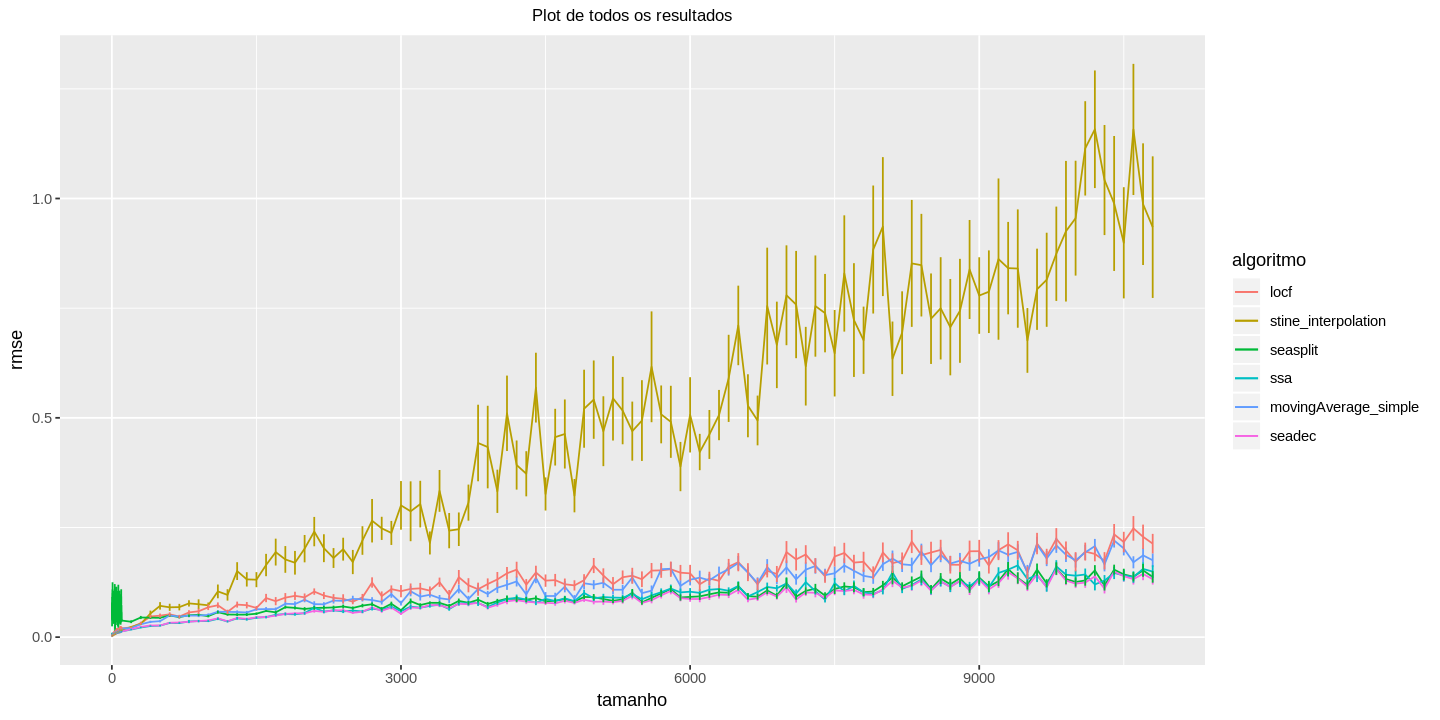

In [41]:
options(repr.plot.width=12, repr.plot.height=6)
rmse=ggplot(todosMedia, aes(x=tamanho, y=rmse, colour=algoritmo))+
  #  geom_point()+
    geom_line()+
    ggtitle("Plot de todos os resultados")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
      #  theme(axis.text=element_text(size=1))+
    theme(plot.title = element_text(hjust = 0.5, size=10))
     #   theme(axis.text=element_text(size=5),axis.title=element_blank())
rmse

Algoritmos utilizados
==
Nota: devido a estudos anteriores foram escolhidos para estudo os algoritmos: 
* Locf, por se tratar de um algoritmo muito rápido e simples; 
* Moving Average Simple: Por estudos anteriores e verificar que é mais eficaz em relação as outras médias móveis e tem o tempo computacional mais baixo em relação as outras duas. 
* Interpolação: Foi feito um estudo entre as interpolações spline e stine, onde o stine deu valores mais baixos de RMSE.
* Seasplit: Por ser rápido e utilizar sazonalidade da série temporal para fazer as imputações; 
* SSA: Por ser um bom algoritmo (falar sobre o processo de imputação dele)

Verificação de rmse de 0 a 99
==

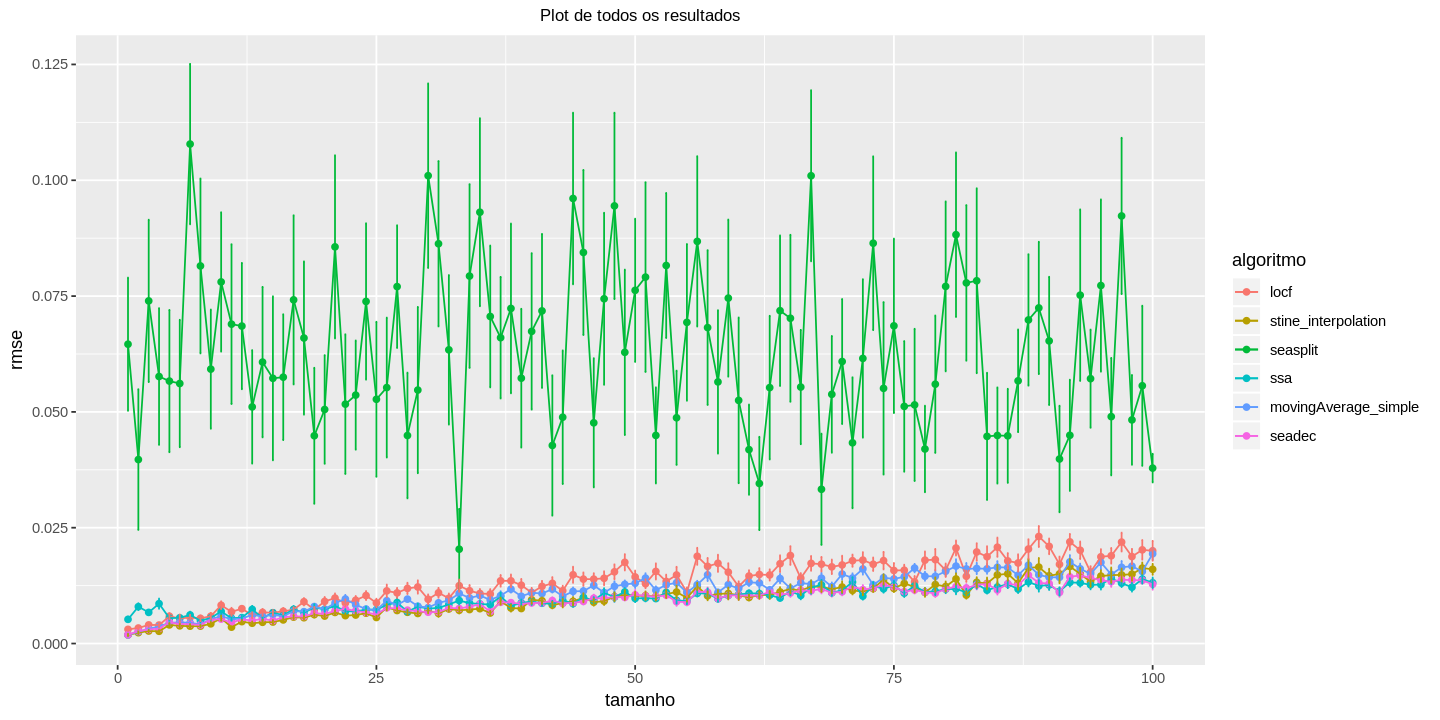

In [6]:
options(repr.plot.width=12, repr.plot.height=6)
ggplot(todosMedia[which(todosMedia$tamanho<=100),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_point()+
    geom_line()+
    ggtitle("Plot de todos os resultados")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))


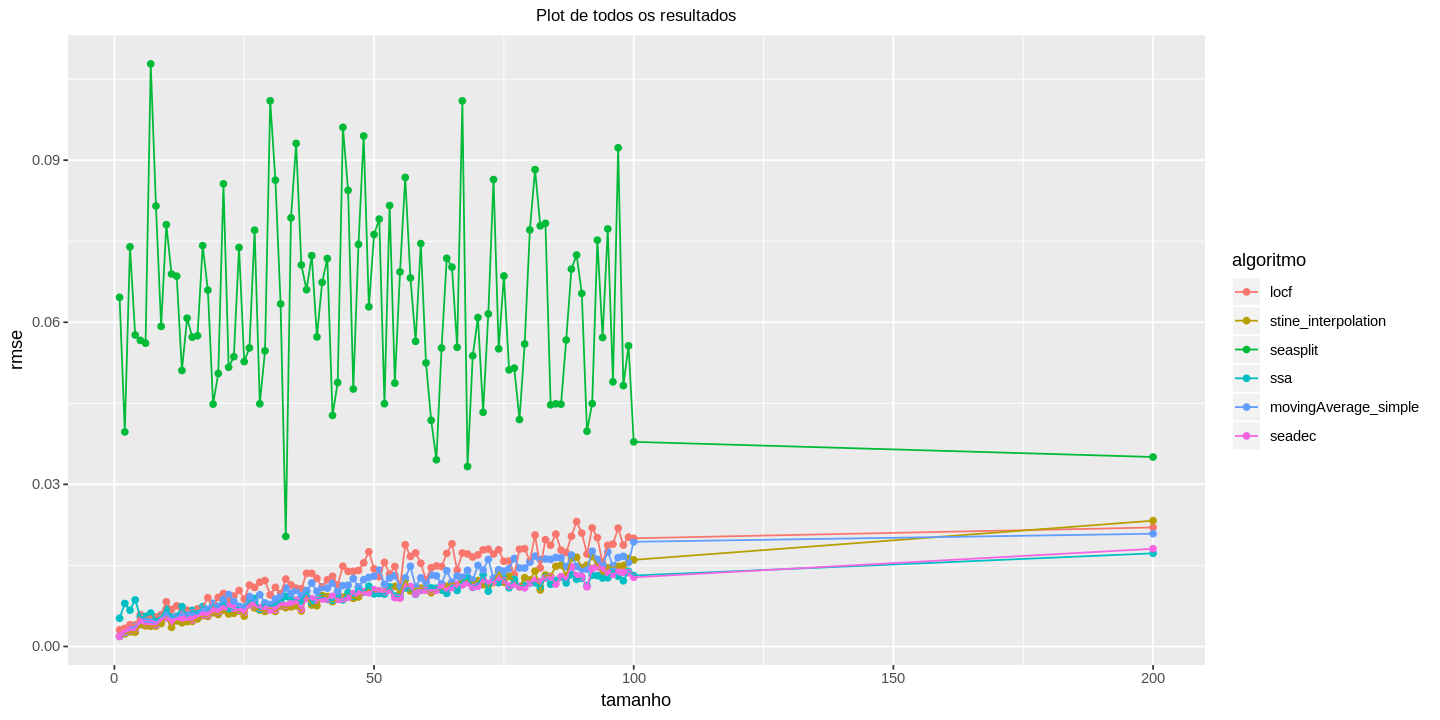

In [7]:
options(repr.plot.width=12, repr.plot.height=6)
ggplot(todosMedia[which(todosMedia$tamanho<=200 ),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_point()+
    geom_line()+
    ggtitle("Plot de todos os resultados")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
   # geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))


NOTA: O Seasplit se mostra muito ruim em lacuna pequenas
Retirando para uma melhor visualização: 

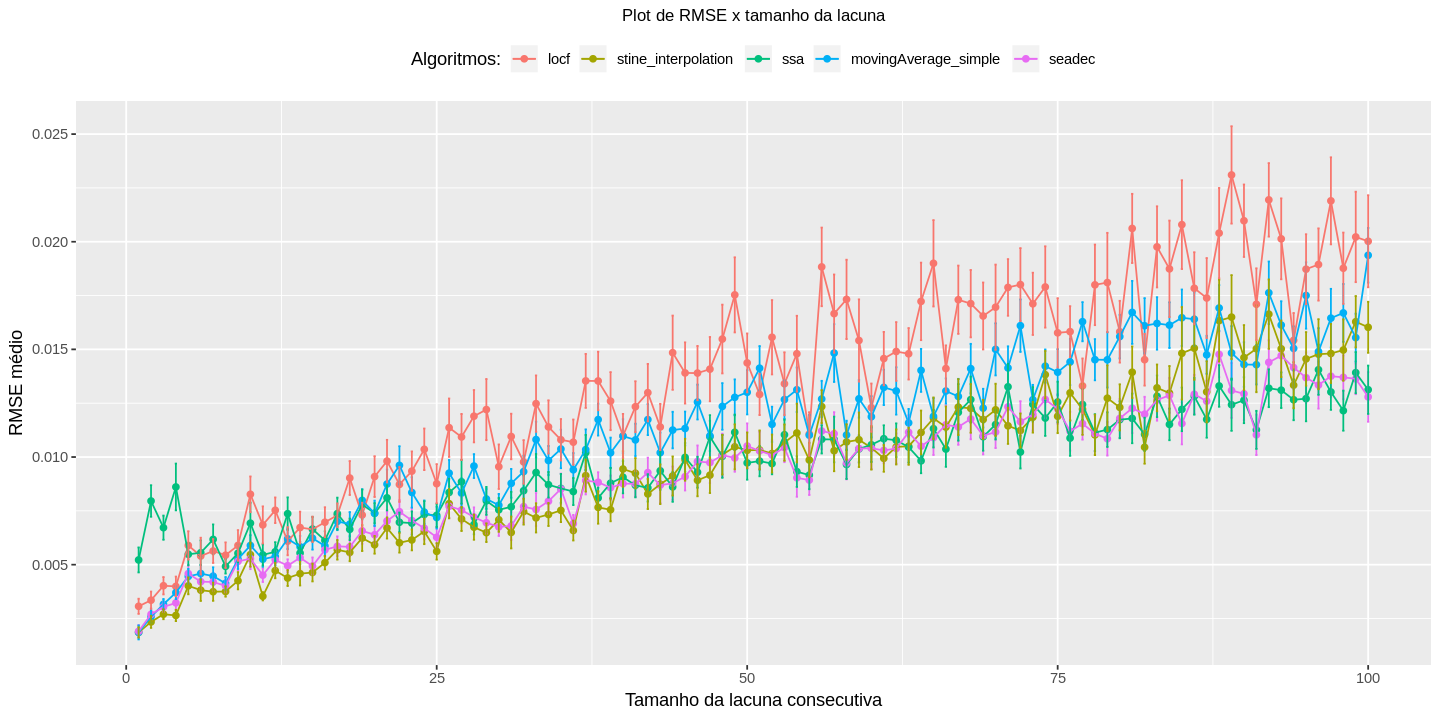

In [8]:
ggplot(todosMedia[which(todosMedia$tamanho<=100 & (todosMedia$algoritmo!="seasplit" & todosMedia$algoritmo!="mean")),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_point()+
    geom_line()+
    ggtitle("Plot de RMSE x tamanho da lacuna")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )

Nota: O stine é o melhor algoritmo em relação ao RMSE de 1 a 26

Plots com intervalo de confiança em 90%
==
Abaixo estão os plots de 0 a 50 e de 50 a 100

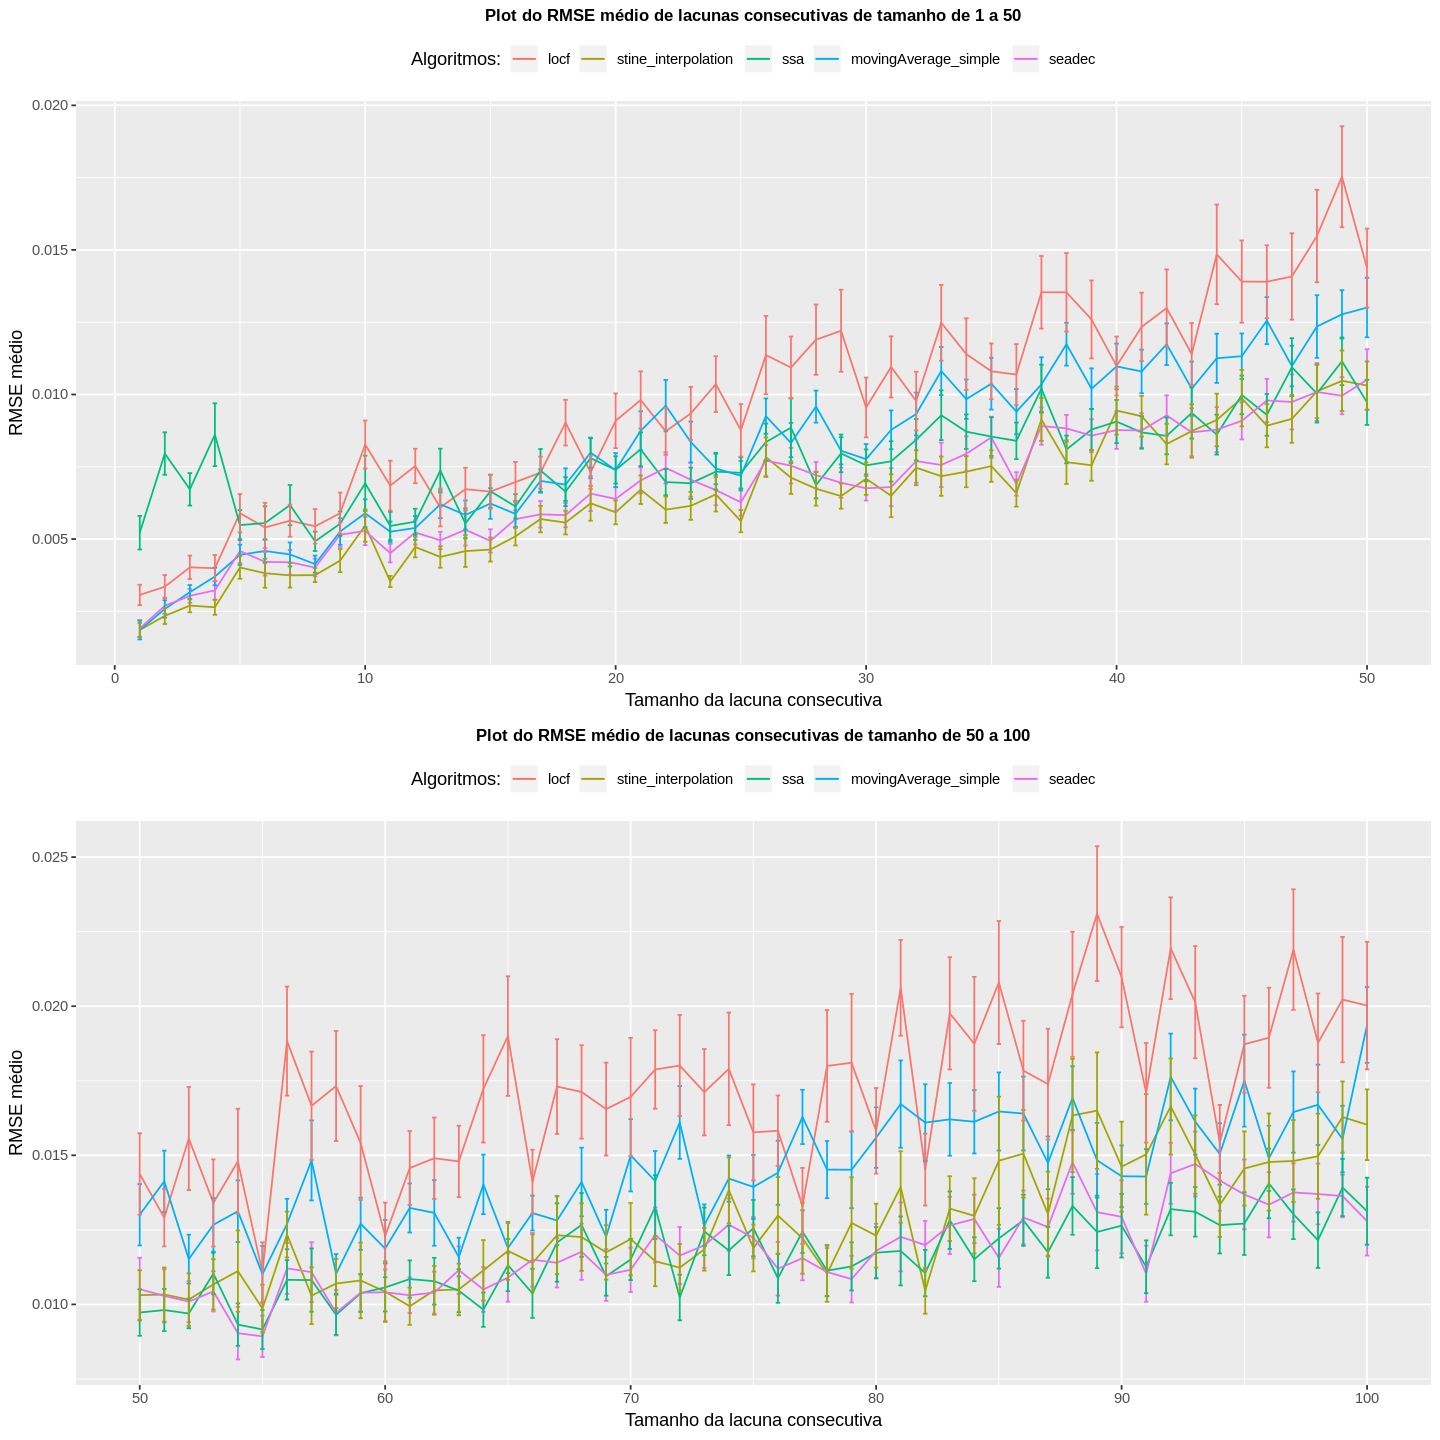

In [9]:
options(repr.plot.width=12, repr.plot.height=12)
q1=ggplot(todosMedia[which(todosMedia$tamanho<=50 & (todosMedia$algoritmo!="seasplit" & todosMedia$algoritmo!="mean")),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_line()+
    ggtitle("Plot do RMSE médio de lacunas consecutivas de tamanho de 1 a 50")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )
q2=ggplot(todosMedia[which((todosMedia$tamanho>=50 & todosMedia$tamanho<=100) &(todosMedia$algoritmo!="seasplit" & todosMedia$algoritmo!="mean")),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_line()+
    ggtitle("Plot do RMSE médio de lacunas consecutivas de tamanho de 50 a 100")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )


grid.arrange(q1,q2, ncol=1)

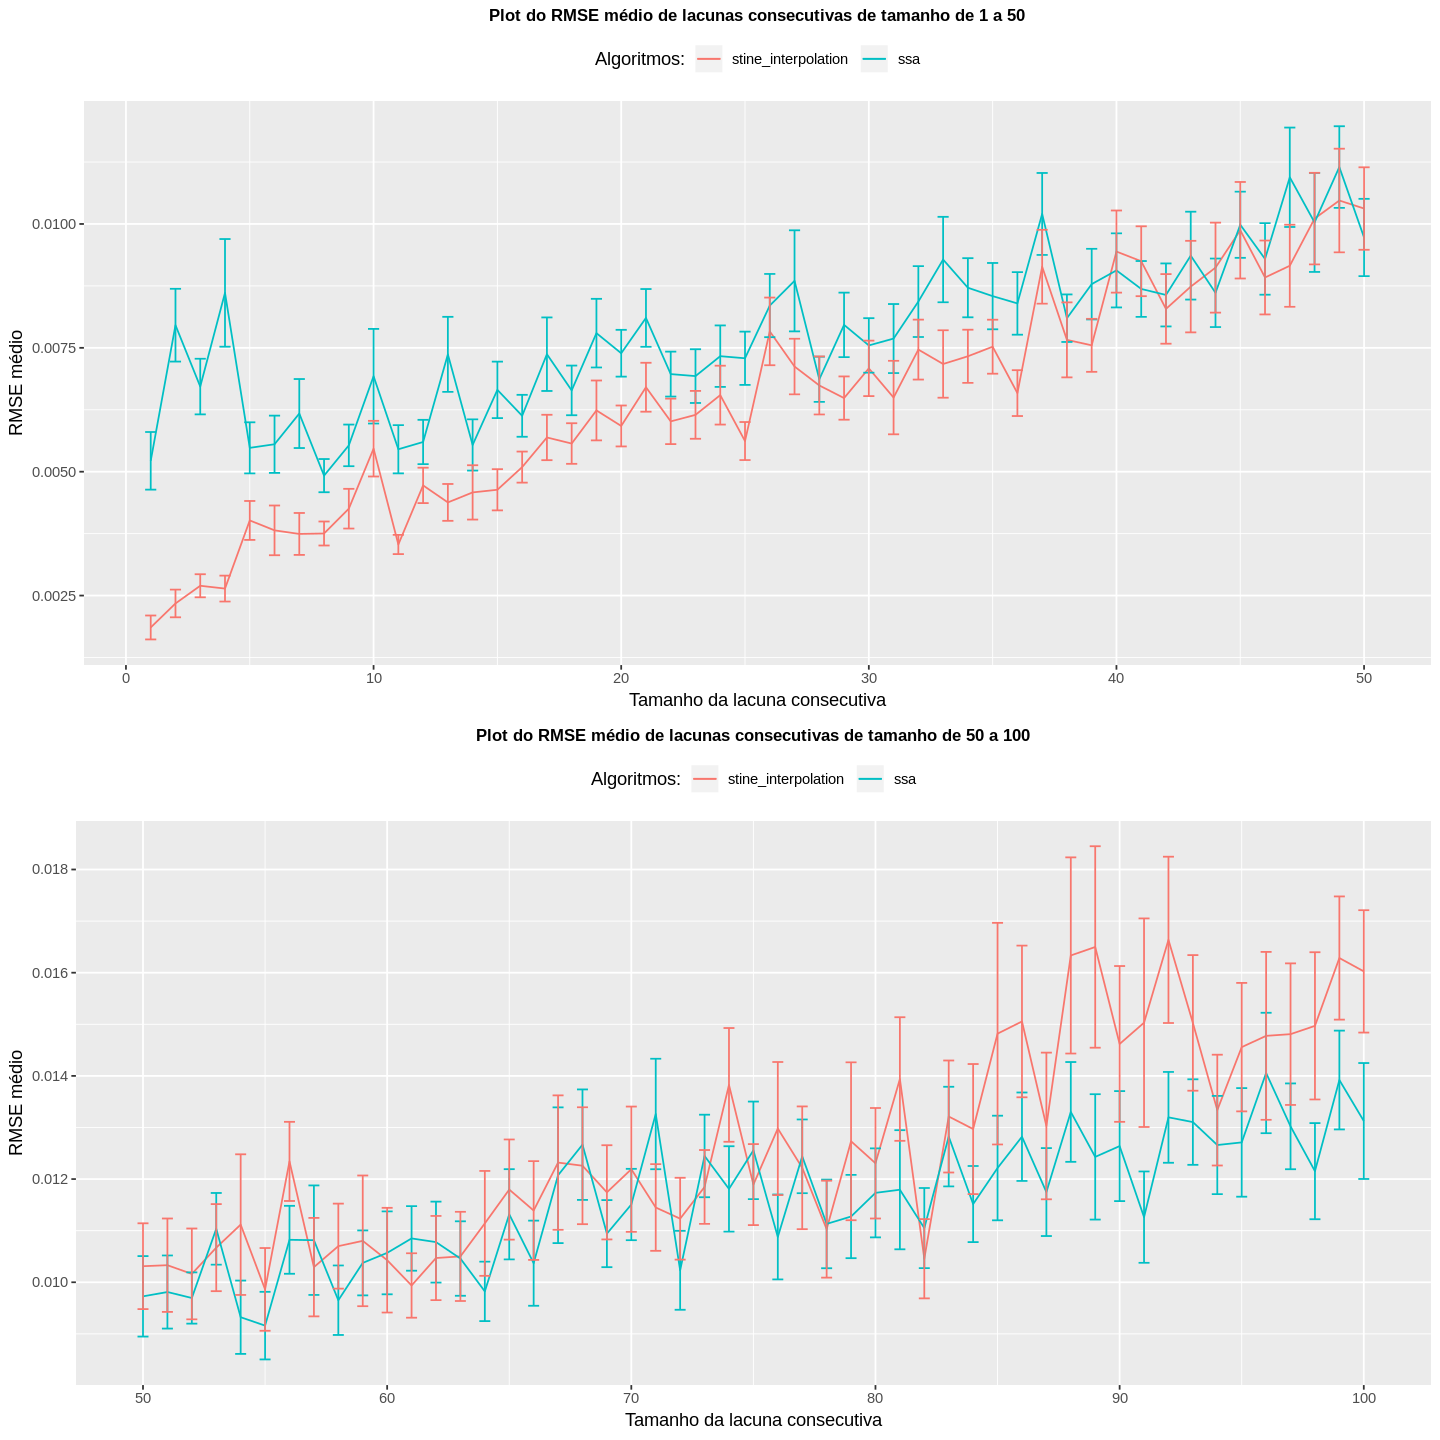

In [10]:
options(repr.plot.width=12, repr.plot.height=12)
q1=ggplot(todosMedia[which(todosMedia$tamanho<=50 & (todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="stine_interpolation")),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_line()+
    ggtitle("Plot do RMSE médio de lacunas consecutivas de tamanho de 1 a 50")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )
q2=ggplot(todosMedia[which((todosMedia$tamanho>=50 & todosMedia$tamanho<=100) &(todosMedia$algoritmo=="stine_interpolation" | todosMedia$algoritmo=="ssa")),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_line()+
    ggtitle("Plot do RMSE médio de lacunas consecutivas de tamanho de 50 a 100")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )


grid.arrange(q1,q2, ncol=1)

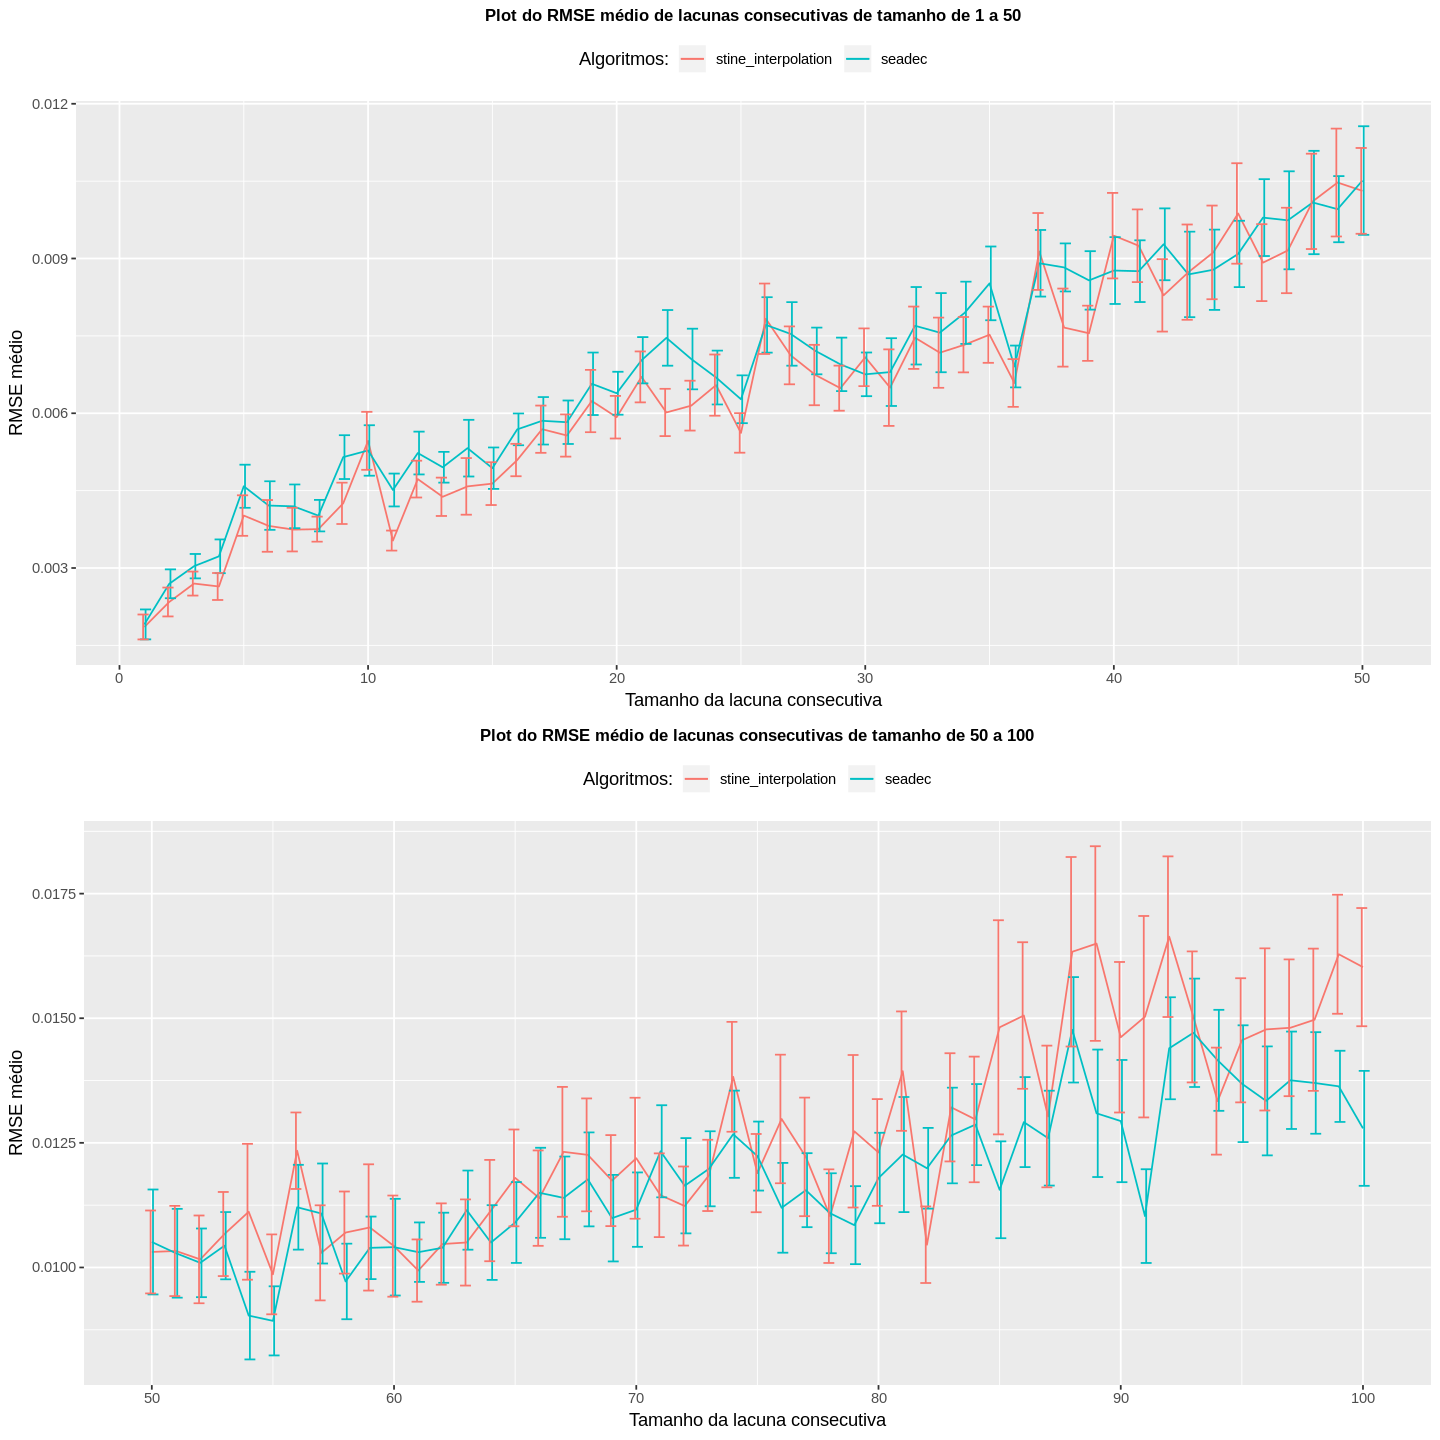

In [31]:
options(repr.plot.width=12, repr.plot.height=12)
q1=ggplot(todosMedia[which(todosMedia$tamanho<=50 & (todosMedia$algoritmo=="seadec" | todosMedia$algoritmo=="stine_interpolation")),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_line()+
    ggtitle("Plot do RMSE médio de lacunas consecutivas de tamanho de 1 a 50")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )
q2=ggplot(todosMedia[which((todosMedia$tamanho>=50 & todosMedia$tamanho<=100) &(todosMedia$algoritmo=="stine_interpolation" | todosMedia$algoritmo=="seadec")),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_line()+
    ggtitle("Plot do RMSE médio de lacunas consecutivas de tamanho de 50 a 100")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )


grid.arrange(q1,q2, ncol=1)

Verificação de rmse de 100 a 10800
==

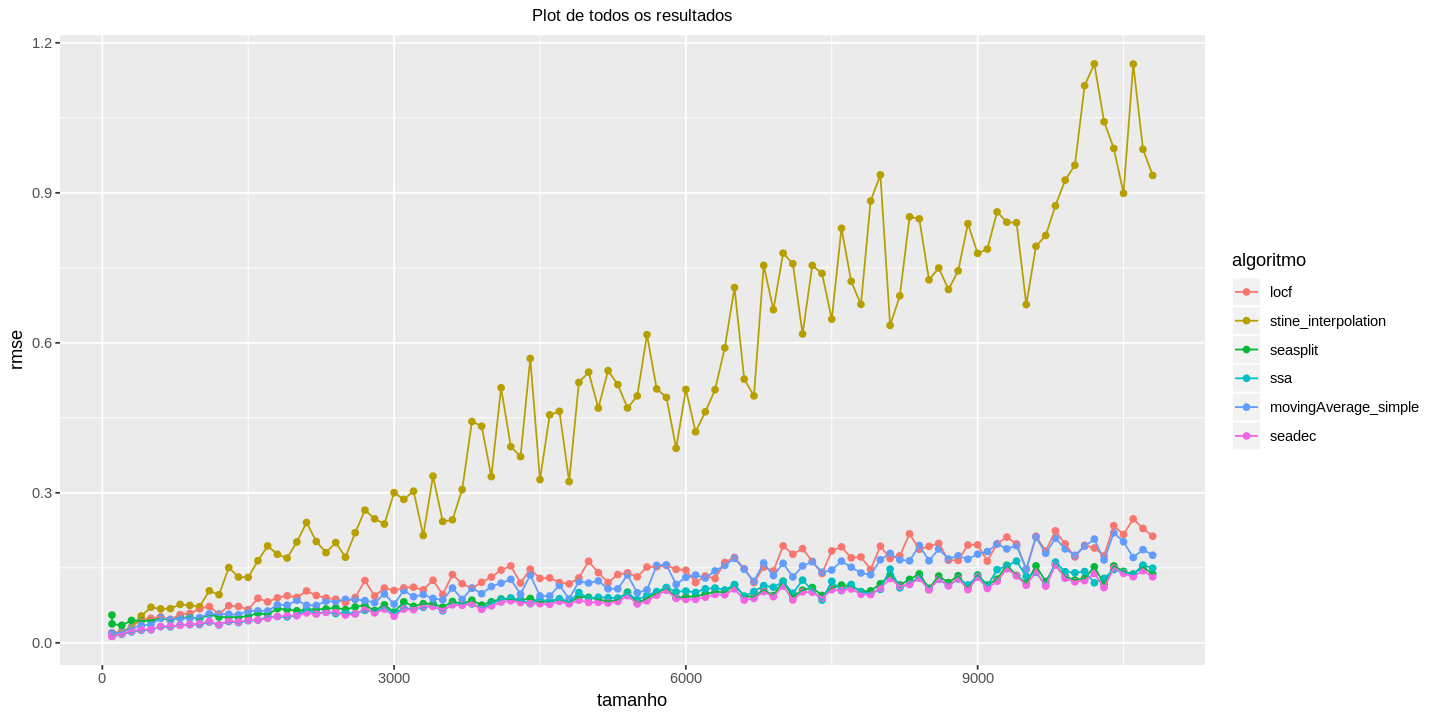

In [11]:
options(repr.plot.width=12, repr.plot.height=6)
ggplot(todosMedia[which(todosMedia$tamanho>=99 ),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_point()+
    geom_line()+
    ggtitle("Plot de todos os resultados")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
  #  geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))


Plots com intervalo de confiança em 90%
==
Abaixo estão os plots de 100 a 3600, 3600 a 7200

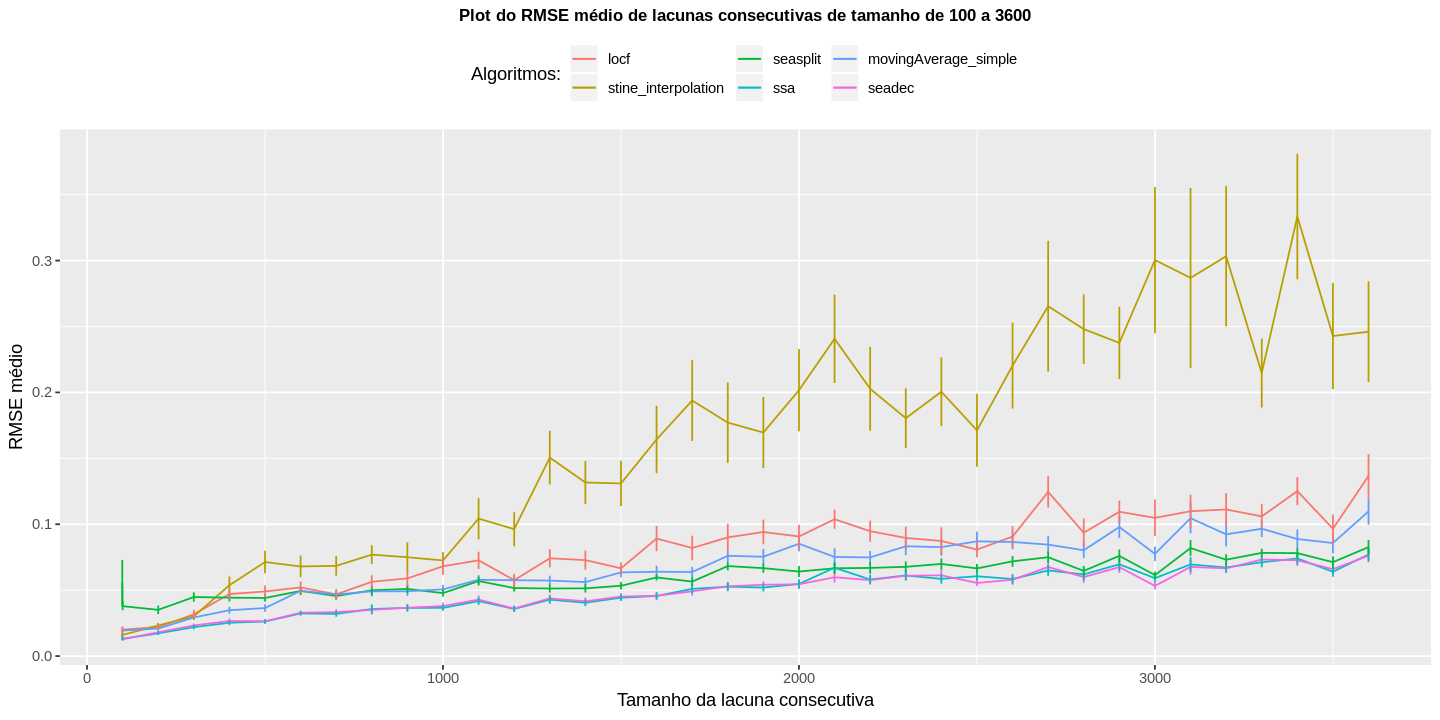

In [12]:
options(repr.plot.width=12, repr.plot.height=6)
q1=ggplot(todosMedia[which((todosMedia$tamanho<=3600 & todosMedia$tamanho>=99) & todosMedia$algoritmo!="mean" ),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_line()+
    ggtitle("Plot do RMSE médio de lacunas consecutivas de tamanho de 100 a 3600")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )
#q2=ggplot(todosMedia[which((todosMedia$tamanho>=3600 & todosMedia$tamanho<=7200) &(todosMedia$algoritmo!="seasplit" & todosMedia$algoritmo!="mean")),], aes(x=tamanho, y=rmse, colour=algoritmo))+

q2=ggplot(todosMedia[which((todosMedia$tamanho>=3600 & todosMedia$tamanho<=7200) ),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_line()+
    ggtitle("Plot do RMSE médio de lacunas consecutivas de tamanho de 50 a 100")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )

q3=ggplot(todosMedia[which((todosMedia$tamanho>=7200) ),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_line()+
    ggtitle("Plot do RMSE médio de lacunas consecutivas de tamanho de 50 a 100")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )



#grid.arrange(q1,q2, q3, ncol=1)
grid.arrange(q1, ncol=1)

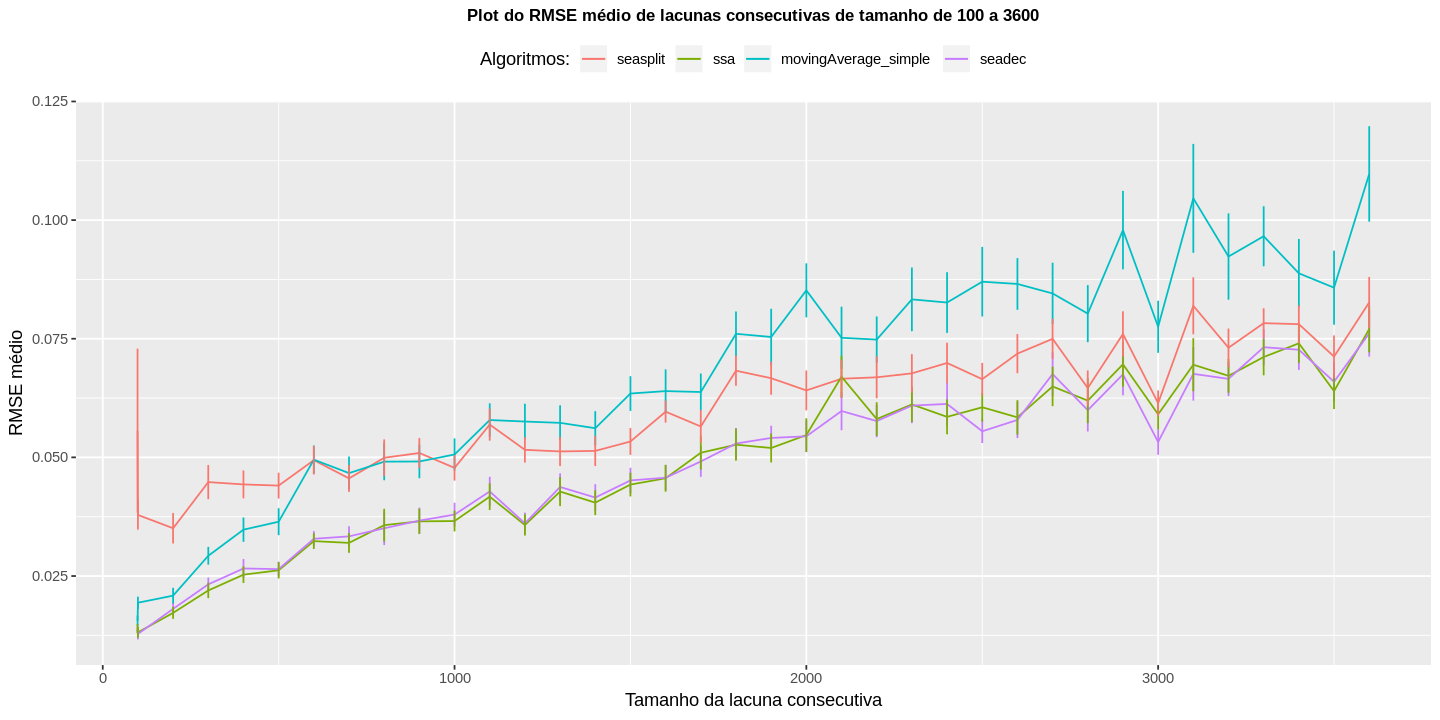

In [32]:
options(repr.plot.width=12, repr.plot.height=6)
q1=ggplot(todosMedia[which((todosMedia$tamanho<=3600 & todosMedia$tamanho>=99) & (todosMedia$algoritmo=="seadec" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="ssa" | todosMedia$algoritmo=="movingAverage_simple" )),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_line()+
    ggtitle("Plot do RMSE médio de lacunas consecutivas de tamanho de 100 a 3600")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )



#grid.arrange(q1,q2, q3, ncol=1)
grid.arrange(q1, ncol=1)

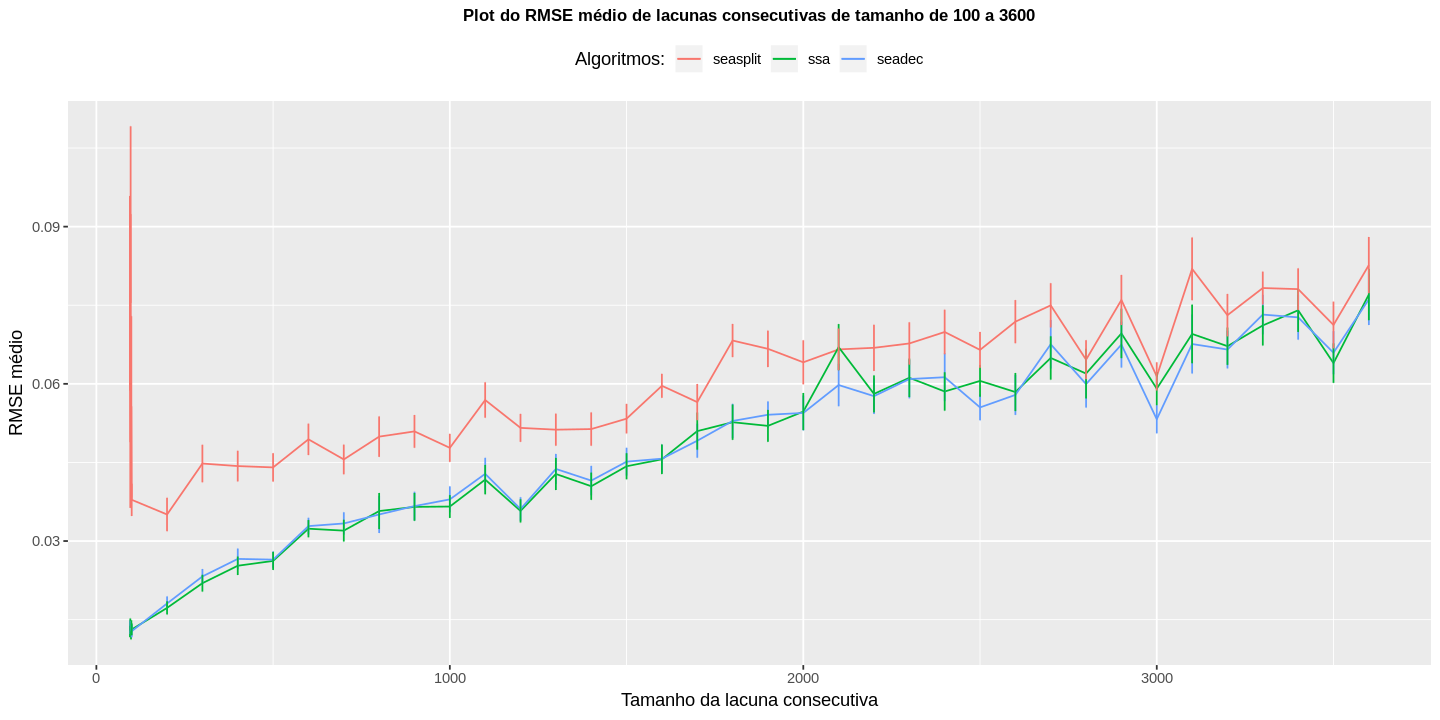

In [33]:
options(repr.plot.width=12, repr.plot.height=6)
q1=ggplot(todosMedia[which((todosMedia$tamanho<=3600 & todosMedia$tamanho>=95) & (todosMedia$algoritmo=="seadec" | todosMedia$algoritmo=="seasplit" | todosMedia$algoritmo=="ssa" )),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_line()+
    ggtitle("Plot do RMSE médio de lacunas consecutivas de tamanho de 100 a 3600")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )



#grid.arrange(q1,q2, q3, ncol=1)
grid.arrange(q1, ncol=1)

NOTA: Decidiu-se usar apenas até o tamanho de lacuna = 3600 por que a partir daí não há conclusões, além de que é uma lacuna muito grande

------------------Tempo-------------------------------------------------------------------
==

Abaixo poderá se verificar que o Locf é o agoritmo mais rápido em tempo de processamento com média de 0.022 segundos de forma linear. 
Seguido por Stine, com média de 0.05 segundos de forma linear; 
em terceiro  seasplit com 0.26 segundos;
em quarto moving average simple com 1.56 
e por ultimo o SSA com crecimento exponencial 


0.0214170692431562
1.52823027375201
0.056341384863124
0.263669887278583
2.47199677938808


In [23]:
algoritmo100a10800=read.table("../expOriginal/time/alg.txt")
tempo100a10800=read.table("../expOriginal/time/tempo.txt")
a=as.data.frame(cbind(algoritmo100a10800, tempo100a10800))
a$tamanho=rep(seq(100,10800,100), each=30)

algoritmo1a100=read.table("../expOriginal1-100/time/alg.txt")
tempo1a100=read.table("../expOriginal1-100/time/tempo.txt")
b=as.data.frame(cbind(algoritmo1a100,tempo1a100))
b$tamanho=rep(seq(1,99,1), each=30)

a=rbind(b,a)
names(a)=c("algoritmo", "tempo", "tamanho")
head(a)
a$tempo=as.numeric(hms(a$tempo))


a$tempo=a$tempo/100
mediaTempo= a %>% group_by(algoritmo, tamanho) %>%
summarize(tempo = mean(tempo, na.rm = TRUE))

sdTempo = a %>% group_by(algoritmo, tamanho) %>%
summarize(sd=sd(tempo, na.rm=TRUE))
mediaTempo$sd=sdTempo$sd


n=30 #tamanho da amostra. Ou seja, tem 30 lacunas de tamanho 100, 30 de tamanho 200...
error=qnorm(0.975)*mediaTempo$sd/sqrt(n)
mediaTempo$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.2) # move them .05 to the left and right


#ajust
temp=(mediaTempo[which(mediaTempo$algoritmo=="seasplit" & mediaTempo$tamanho<=99), 3] - 0.65)
nrow(temp)
temp2=(mediaTempo[which(mediaTempo$algoritmo=="seasplit" & mediaTempo$tamanho>99), 3])
temp1=rbind(temp, temp2)
mediaTempo[which(mediaTempo$algoritmo=="seasplit"),3] = temp1


mediaTempo= mediaTempo[which(mediaTempo$algoritmo=="seadec" | mediaTempo$algoritmo=="locf" |  mediaTempo$algoritmo=="movingAverage_simple" | mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo=="seasplit" | mediaTempo$algoritmo=="ssa"),]

algoritmo,tempo,tamanho
linear_interpolation,0:00.03,1
linear_interpolation,0:00.05,1
linear_interpolation,0:00.03,1
linear_interpolation,0:00.04,1
linear_interpolation,0:00.04,1
linear_interpolation,0:00.03,1


[1] 99

In [24]:
teste=(mediaTempo[which(mediaTempo$algoritmo=="locf"), 3])
mean(teste$tempo)

teste=(mediaTempo[which(mediaTempo$algoritmo=="movingAverage_simple"), 3])
mean(teste$tempo)

teste=(mediaTempo[which(mediaTempo$algoritmo=="stine_interpolation"), 3])
mean(teste$tempo)

teste=(mediaTempo[which(mediaTempo$algoritmo=="seasplit"), 3])
mean(teste$tempo)

teste=(mediaTempo[which(mediaTempo$algoritmo=="ssa"), 3])
mean(teste$tempo)


[1] 0.02141707

[1] 1.52823

[1] 0.05634138

[1] 0.2636699

[1] 2.471997

In [25]:
dfCompleto=as.data.frame(rbind(mediaTempo[which(mediaTempo$algoritmo=="locf"), 1:3], 
            mediaTempo[which(mediaTempo$algoritmo=="movingAverage_simple"), 1:3], 
            mediaTempo[which(mediaTempo$algoritmo=="stine_interpolation"), 1:3], 
            mediaTempo[which(mediaTempo$algoritmo=="seasplit"), 1:3], 
            mediaTempo[which(mediaTempo$algoritmo=="ssa"), 1:3]
           ))
teste2=as.data.frame(rbind(todosMedia[which(todosMedia$algoritmo=="locf"), 1:3], 
            todosMedia[which(todosMedia$algoritmo=="movingAverage_simple"), 1:3], 
            todosMedia[which(todosMedia$algoritmo=="stine_interpolation"), 1:3], 
            todosMedia[which(todosMedia$algoritmo=="seasplit"), 1:3], 
            todosMedia[which(todosMedia$algoritmo=="ssa"), 1:3]
           ))
dfCompleto$rmse=teste2[,3]


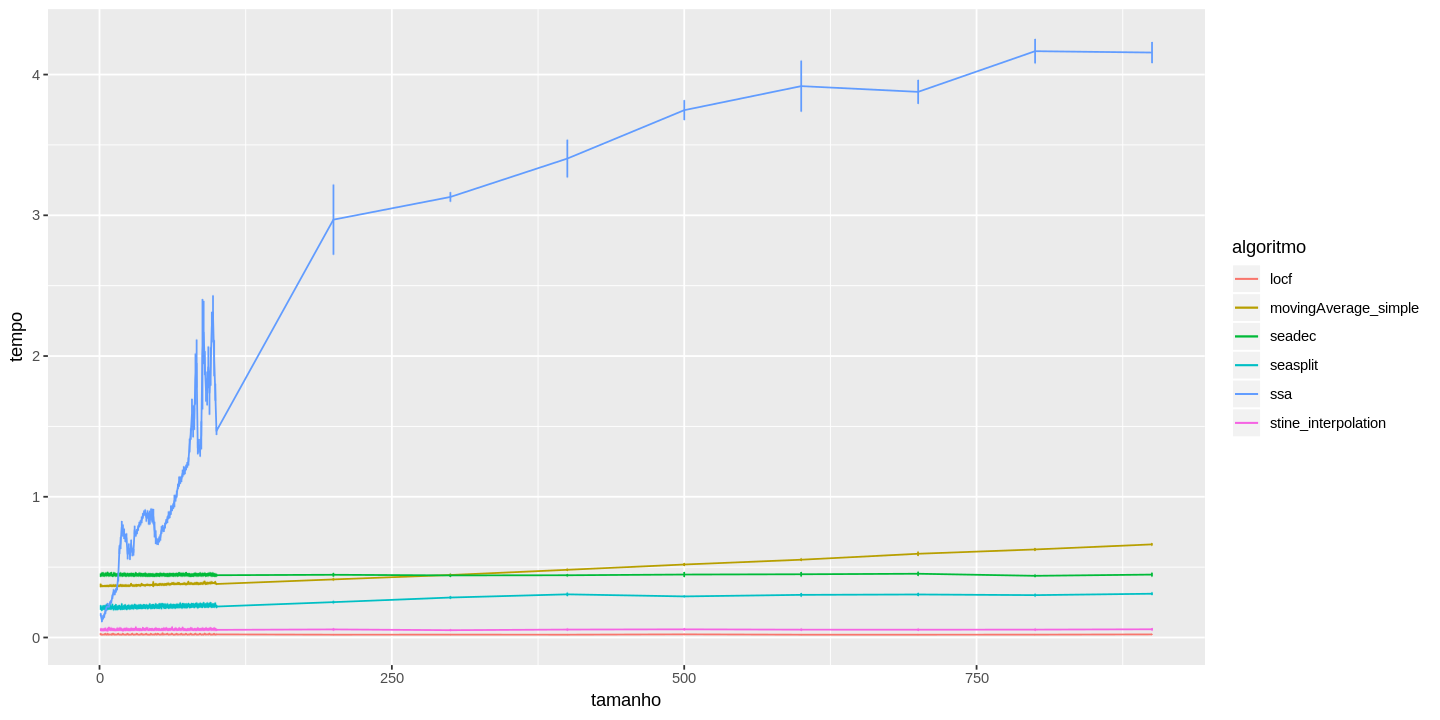

In [26]:
algTempo=ggplot(mediaTempo, aes(x=tamanho, y=tempo, colour=algoritmo))+
	geom_line()+
    geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) 
    #+geom_point()

ggplot(mediaTempo[which(mediaTempo$algoritmo=="" | mediaTempo$tamanho<1000),], aes(x=tamanho, y=tempo, colour=algoritmo))+
geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) +
geom_line()#+ geom_point()


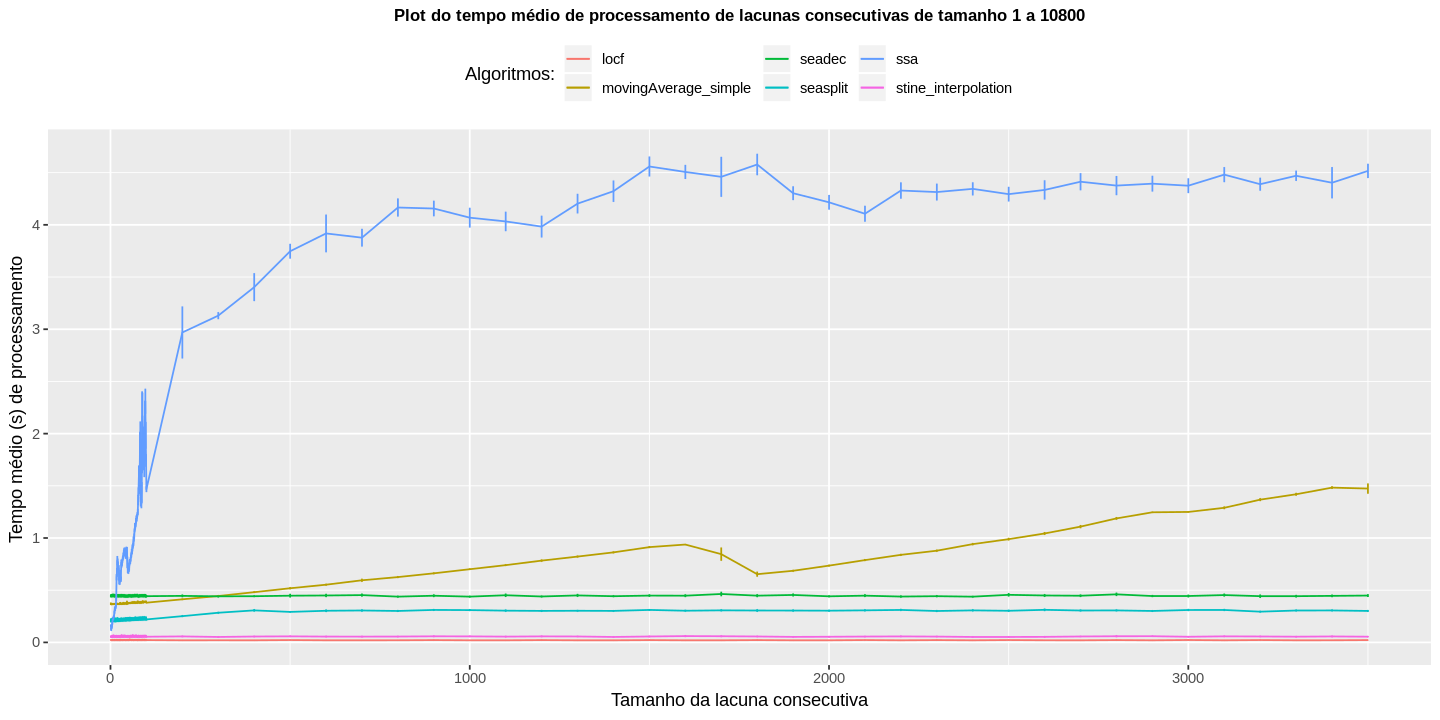

In [34]:
options(repr.plot.width=12, repr.plot.height=6)
ggplot(mediaTempo[which((mediaTempo$algoritmo=="seadec" | mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo=="ssa" | mediaTempo$algoritmo=="movingAverage_simple" | mediaTempo$algoritmo=="locf" | mediaTempo$algoritmo=="seasplit") & mediaTempo$tamanho<3600),], aes(x=tamanho, y=tempo, colour=algoritmo))+
geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) +
geom_line()+
    ggtitle("Plot do tempo médio de processamento de lacunas consecutivas de tamanho 1 a 10800")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "Tempo médio (s) de processamento ",
    colour = "Algoritmos:"
   )


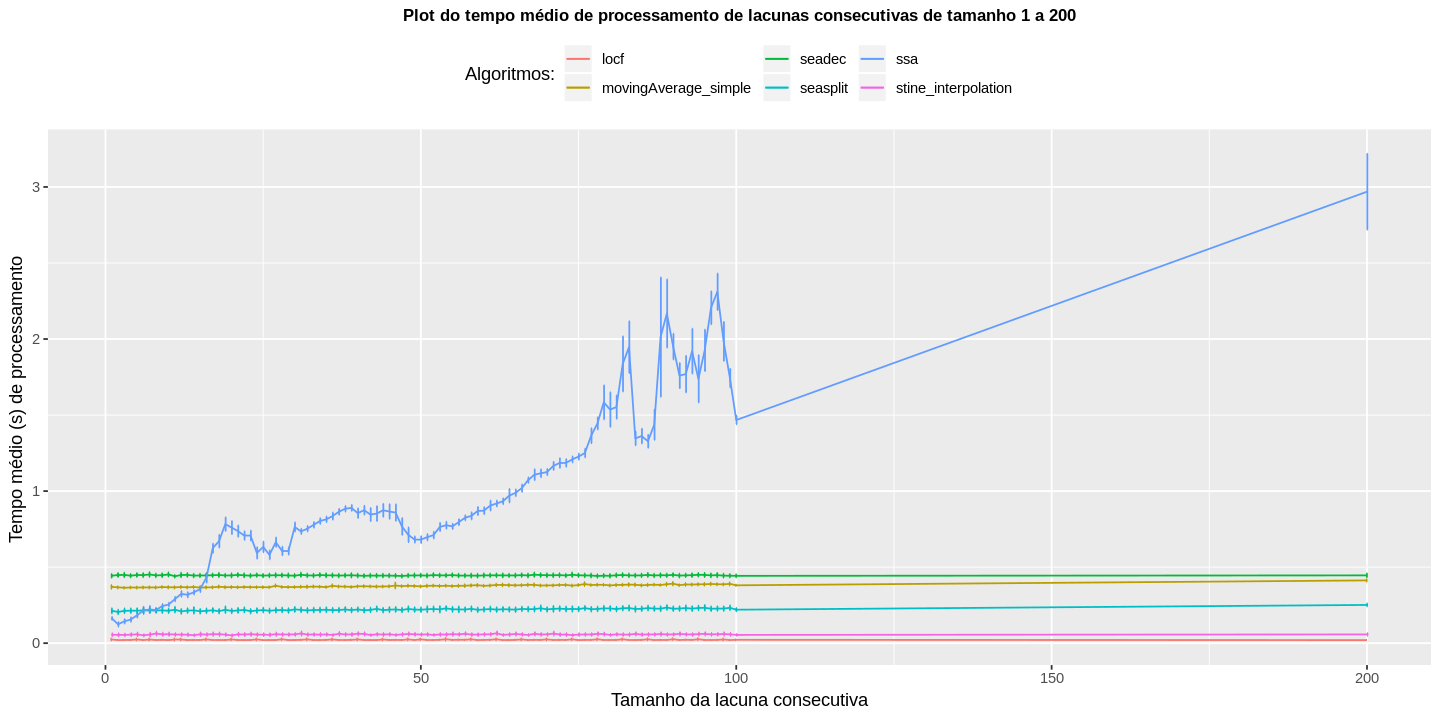

In [35]:
options(repr.plot.width=12, repr.plot.height=6)
#ggplot(mediaTempo[which(mediaTempo$tamanho<500) & (mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo=="ssa" | mediaTempo$algoritmo=="movingAverage_linear" | mediaTempo$algoritmo=="locf" | mediaTempo$algoritmo=="seasplit"),], aes(x=tamanho, y=tempo, colour=algoritmo))+
ggplot(mediaTempo[which((mediaTempo$algoritmo=="seadec" | mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo=="ssa" | mediaTempo$algoritmo=="movingAverage_simple" | mediaTempo$algoritmo=="locf" | mediaTempo$algoritmo=="seasplit") & mediaTempo$tamanho<=200),], aes(x=tamanho, y=tempo, colour=algoritmo))+
geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) +
geom_line() +
    ggtitle("Plot do tempo médio de processamento de lacunas consecutivas de tamanho 1 a 200")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "Tempo médio (s) de processamento ",
    colour = "Algoritmos:"
   )

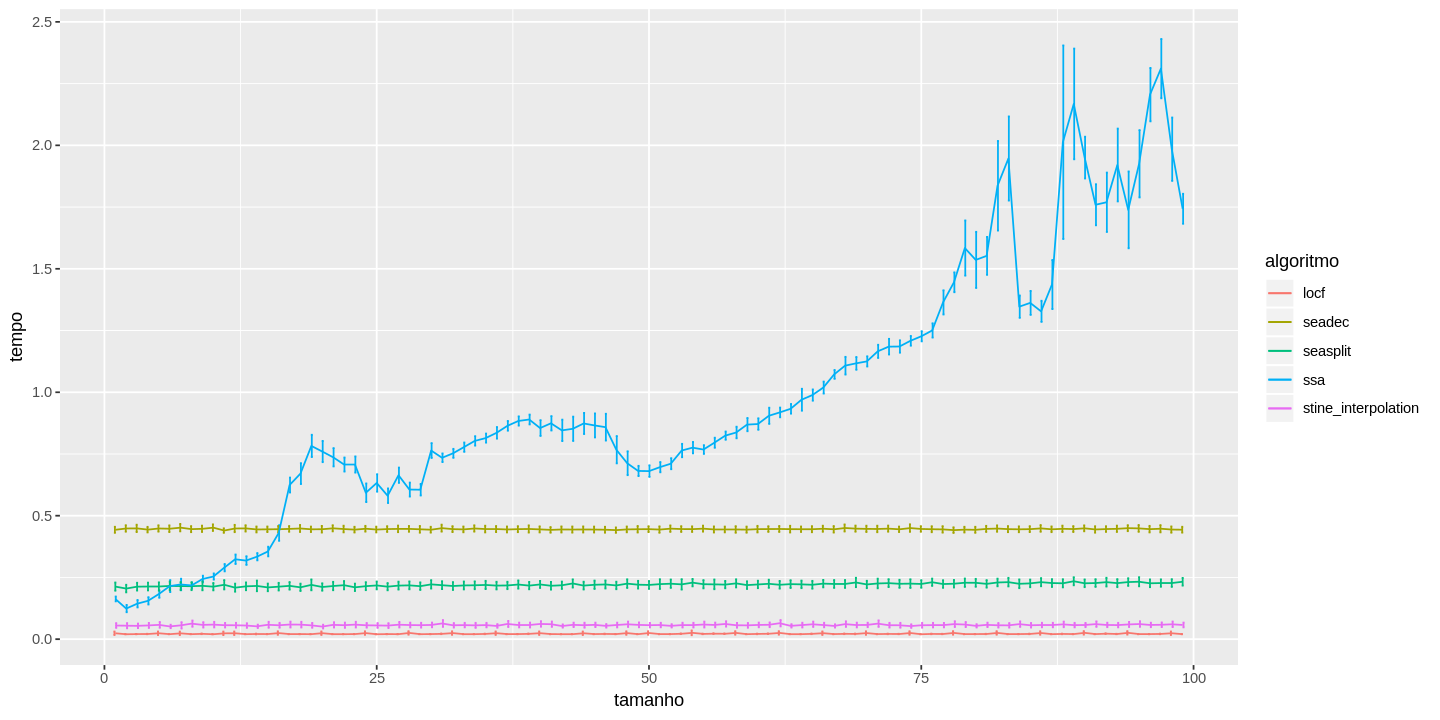

In [36]:
options(repr.plot.width=12, repr.plot.height=6)
#ggplot(mediaTempo[which((mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo!="ssa" | mediaTempo$algoritmo=="movingAverage_linear" | mediaTempo$algoritmo=="locf" | mediaTempo$algoritmo=="seasplit") & mediaTempo$tamanho<10000),], aes(x=tamanho, y=tempo, colour=algoritmo))+
ggplot(mediaTempo[which((mediaTempo$algoritmo=="seadec" | mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo=="ssa" | mediaTempo$algoritmo=="locf" | mediaTempo$algoritmo=="seasplit") & mediaTempo$tamanho<100),], aes(x=tamanho, y=tempo, colour=algoritmo))+
geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) +
geom_line()

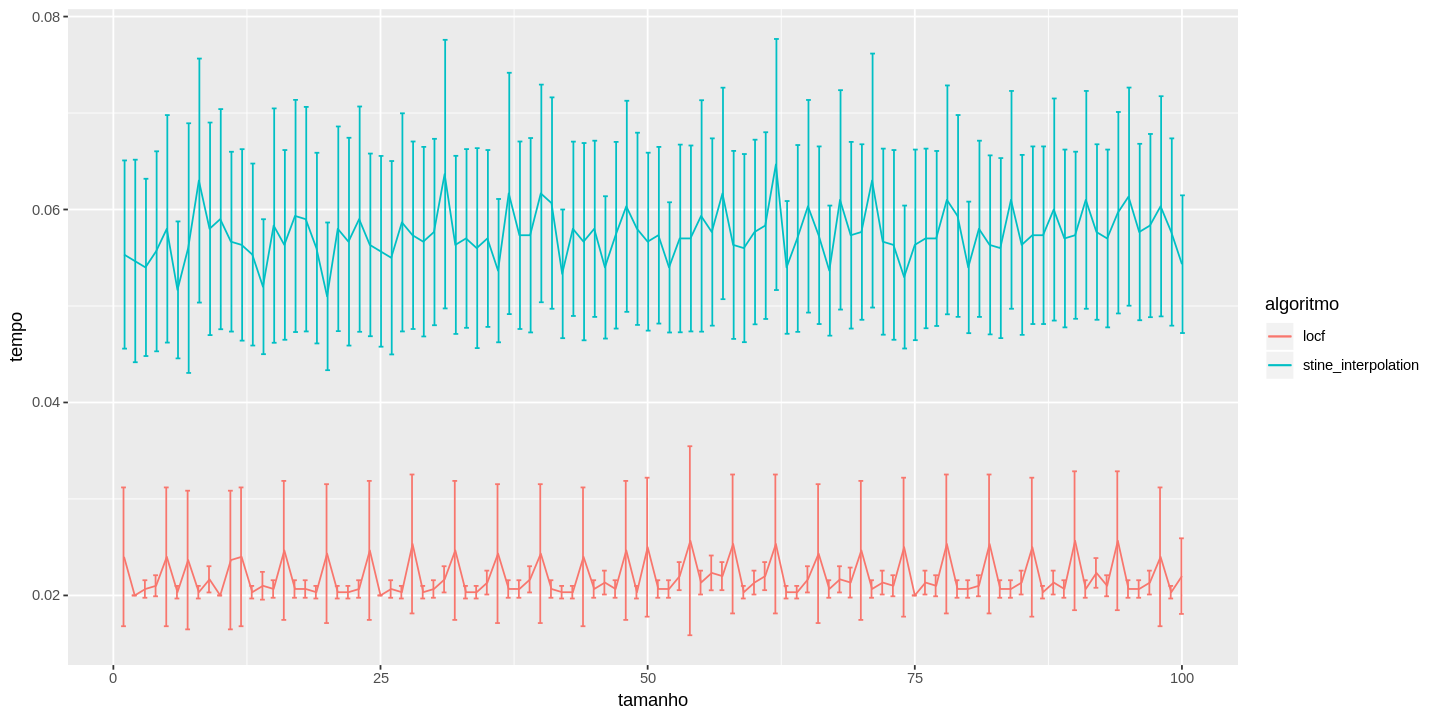

In [30]:
options(repr.plot.width=12, repr.plot.height=6)
#ggplot(mediaTempo[which((mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo!="ssa" | mediaTempo$algoritmo=="movingAverage_linear" | mediaTempo$algoritmo=="locf" | mediaTempo$algoritmo=="seasplit") & mediaTempo$tamanho<10000),], aes(x=tamanho, y=tempo, colour=algoritmo))+
ggplot(mediaTempo[which((mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo=="locf") & mediaTempo$tamanho<150),], aes(x=tamanho, y=tempo, colour=algoritmo))+
geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) +
geom_line()